![ga4](https://www.google-analytics.com/collect?v=2&tid=G-6VDTYWLKX6&cid=1&en=page_view&sid=1&dl=statmike%2Fvertex-ai-mlops%2F02+-+Vertex+AI+AutoML&dt=02a+-+Vertex+AI+-+AutoML+in+GCP+Console+%28no+code%29.ipynb)

# 02a - Vertex AI - AutoML in GCP Console (no code)

Use Vertex AI from the GCP Console for a no-code approach building a custom model with AutoML and deploy it for predictions.


### Prerequisites:
-  01 - BigQuery - Table Data Source

### Resources:
-  [AutoML Tabular Training Job With GCP Console](https://cloud.google.com/vertex-ai/docs/training/automl-console#tabular)

### Related Training:
-  [Tutorial for AutoML Tabular](https://cloud.google.com/vertex-ai/docs/tutorials/tabular-automl)

<p align="center">
  <img alt="Conceptual Flow" src="../architectures/overview/02_overview.png" width="25%">
</p>


### Conceptual Flow & Workflow
<p align="center">
  <img alt="Conceptual Flow" src="../architectures/slides/02a_arch.png" width="70%">
</p>
<p align="center">
    <img alt="Workflow" src="../architectures/slides/02a_console.png" width="70%">
</p>

we are starting with the datsets, which linked in the tables in BigQuery/GCS, then we use autoML tables, we have tabular data (rows, cols). Then, that will create model, we are going to use the prediction service to deploy it to an endpoint, we can also use explainable AI, to explain those results more

---
## Create Dataset (link to BigQuery table)

From the Console:
- Go to Vertex AI
- Selected `Datasets`
- Select `CREATE DATASET`

<img src="../architectures/notebooks/02a_screenshots/ds_1.png" width="50%">

- Name the dataset `02a`
- Select `Tabular` and `Regression/classification`
    - [More on Model Types](https://cloud.google.com/vertex-ai/docs/start/automl-model-types)
- Click `Create`

<img src="../architectures/notebooks/02a_screenshots/ds_2.png" width="50%">

- Under Select a data source pick `Select a table or view from BigQuery`
- Enter the BigQuery path (or browse) to the prepped table created in notebook 01
- Click `CONTINUE`

<img src="../architectures/notebooks/02a_screenshots/ds_3.png" width="50%">

- The `ANALYZE` tab for the dataset will be displayed for review:

<img src="../architectures/notebooks/02a_screenshots/ds_4.png" width="50%">

- Going back to the `Datasets` dashboard will display the registered dataset

<img src="../architectures/notebooks/02a_screenshots/ds_5.png" width="50%">

---
## Train Model with AutoML

On The Vertex AI console, select `Training`:

<img src="../architectures/notebooks/02a_screenshots/train_1.png" width="50%">

Next to `Training` (near the top), select `CREATE`
- For Dataset enter `02a`
- For Objective make sure `Classification` is selected
- Use `AutoML` for the method
- Click `CONTINUE`

<img src="../architectures/notebooks/02a_screenshots/train_2.png" width="50%">

For `Model Details`:
- Keep the default `Model name` which appends a datetime to the end of the dataset name
- For `Target column` select the column to train predictions for
- Expand `ADVANCED OPTIONS`:
    - Select `Manual` for the Data split method
    - Select the `splits` variables that was created in Notebook 01
- Click `CONTINUE`

<img src="../architectures/notebooks/02a_screenshots/train_3.png" width="50%">

For `Training options`:
- Click the `-` symbol next to any rows for variables that should be excluded from training, like the `transaction_id`
- More on Adavanced Options:
    - [Model Weights](https://cloud.google.com/vertex-ai/docs/datasets/prepare-tabular#weight)
    - [Optimization Objectives](https://cloud.google.com/vertex-ai/docs/training/tabular-opt-obj)
        - Pick AUC PR (Due to imbalance in Class)
- Click `CONTINUE`

<img src="../architectures/notebooks/02a_screenshots/train_4.png" width="50%">

For `Compute and pricing`:
- Enter a `Budget` of 1 node hour
    - A guide for choosing the right amount of time can be found [here](https://cloud.google.com/vertex-ai/docs/training/automl-console#tabular) https://cloud.google.com/vertex-ai/pricing#automl_models: 
- Make sure `Enable early stopping` is toggled on
- Click `START TRAINING`

<img src="../architectures/notebooks/02a_screenshots/train_5.png" width="50%">

Return to the Vertex AI console `Training` Menu:
- Once the model completes training the name will be accompanied by a green check mark

<img src="../architectures/notebooks/02a_screenshots/train_6.png" width="50%">

---
## Model: Evaluate, Select, Deploy

On the Vertex AI console, select `Models`

<img src="../architectures/notebooks/02a_screenshots/model_1.png" width="50%">

Select the model that was just trained - starts with `02a`:

we can chnge the threshold
- This brings up the `EVALUATE` tab for the model

<img src="../architectures/notebooks/02a_screenshots/model_2.png" width="50%">

Select the tab labeled `DEPLOY & TEST`:

<img src="../architectures/notebooks/02a_screenshots/model_3.png" width="50%">

---
## Endpoint

is like a web address that we can send our request to, like new transaction with all features in a row, and it would run it through this model and return back the predicted value for the target.
We need an infrastructure to host the end point and the container that has the model and the actual logic behind it.

While still on the Vetex AI `Models` section with the `DEPLOY & TEST` tab selected:
- select `DEPLOY TO ENDPOINT`

<img src="../architectures/notebooks/02a_screenshots/model_3.png" width="50%">

In the `Deploy to endpoint` menus, complete `Define your endpoint`:
- For Endpoint name use `02a`
- keep defaults for location and Access
- Select `CONTINUE`

<img src="../architectures/notebooks/02a_screenshots/endpoint_1.png" width="50%">

In the `Model settings` section:
- Traffic split should be 100. For example if I make a better model, I can first put 10-20% of traffic against the new model and make sure its working well. Then, ramp it up to 100% and take the old model away. This is a great way to ease a model in production.
- minimum number of computes nodes is 1
- Logging: if we are trying to trigger events.
- keep the remaining default values for max nodes, scaling, logging and explainability
- Select `CONTINUE`

<img src="../architectures/notebooks/02a_screenshots/endpoint_2.png" width="50%">

In the `Model monitoring` section:
- Toggle `Enable model monitoring for this endpoint` on
    - for monitoring job use the name `02a`
    - use defaults for the other menue items
- Select `CONTINUE`

<img src="../architectures/notebooks/02a_screenshots/endpoint_3.png" width="50%">

In the `Monitoring objectives` section:
- Select `Prediction Drift Detection` under Monitoring objective
- Select `DEPLOY`

<img src="../architectures/notebooks/02a_screenshots/endpoint_4.png" width="50%">

Once the model is done being deployed to the endpoint, click the `Endpoints` section of Vertex AI:
- Select the endpoint that starts with `02a`
- Review the endpoint dashboard for the deployed model

<img src="../architectures/notebooks/02a_screenshots/endpoint_5.png" width="50%">


#### Online predictions vs Batch predictions

-  Online predictions: an app receiving new transaction and sent it to our model and get a response right away.
-  Batch predictions: where we take a whole bunch of new records, maybe every night/hour, run them through the model and get predictions back.

---
## Batch

In the Verex AI console select Training, click on your model, then select `Batch predict` section:


Select `Create Batch Prediction`:
- name the prediction `02a`
- for model name select the model that starts with `02a`
- for Select source, pick BigQuery table
- provide the location of the BigQuery source table: fraud
- for storage location pick output format of BigQuery
- provide the project for output in BigQuery
- select `Generate feature importance`
- select `Enable feature attributions for this model`
- select `CREATE`

<img src="../architectures/notebooks/02a_screenshots/batch_2.png" width="50%">

Once the batch prediction job completes it will be listed with a green checkmark under `Batch Predictions`

<img src="../architectures/notebooks/02a_screenshots/batch_3.png" width="50%">

Selecting the batch prediction job that starts with `02a` bring up the details of the prediction job

<img src="../architectures/notebooks/02a_screenshots/batch_4.png" width="50%">

Select the linked BigQuery output table next to `Export location`:

<img src="../architectures/notebooks/02a_screenshots/batch_5.png" width="50%">

---
## Prediction

inputs:

In [14]:
project = !gcloud config get-value project
PROJECT_ID = project[0]
PROJECT_ID

'avid-streamer-396319'

In [15]:
REGION = 'us-central1'
DATANAME = 'fraud'
NOTEBOOK = '02a'

# Model Training
VAR_TARGET = 'Class'
VAR_OMIT = 'transaction_id' # add more variables to the string with space delimiters

packages:

In [16]:
from google.cloud import aiplatform

from google.cloud import bigquery
from google.protobuf import json_format
from google.protobuf.struct_pb2 import Value
import json
import numpy as np

setup clients to get to vertex ai endpoint:

In [17]:
aiplatform.init(project=PROJECT_ID, location=REGION)
bigquery = bigquery.Client()

parameters:

In [18]:
DIR = f"temp/{NOTEBOOK}"

environment:

In [19]:
!rm -rf {DIR}
!mkdir -p {DIR}

### Prepare a record for prediction: instance and parameters lists

go to bigQuery and pull back some test records

In [20]:
pred = bigquery.query(query = f"SELECT * FROM {DATANAME}.{DATANAME}_prepped WHERE splits='TEST' LIMIT 10").to_dataframe()

In [21]:
pred.head(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,transaction_id,splits
0,119592,2.139741,0.245651,-2.654856,0.178287,1.336991,-0.724664,0.906032,-0.436125,-0.528015,...,-0.216033,0.345316,0.747103,0.700184,-0.123739,-0.099989,0.0,0,c1908dfc-b9fe-4329-947f-ce1d8b705ac3,TEST
1,129420,-0.539919,1.273124,0.987345,2.207887,0.827857,1.099094,0.154173,0.567619,-1.140350,...,-0.039536,0.308004,-1.128751,-0.291094,-0.157021,-0.031830,0.0,0,f97a4ab2-dfa3-4745-bfb5-19796e93f0c1,TEST
2,75176,1.235603,0.041383,0.675286,0.836279,-0.675016,-0.657342,-0.154209,-0.067491,0.602617,...,0.088164,0.396205,0.324557,0.182930,-0.017115,0.014979,0.0,0,41e4cf07-f271-45fe-babe-88af8c4a9d69,TEST
3,167575,1.808792,-0.632766,-0.547739,0.142396,0.222408,1.824899,-1.068149,0.721798,0.914282,...,0.262650,-1.741824,-0.606627,0.493312,0.049780,-0.075780,0.0,0,ec304a05-c031-43ab-a903-461cd394de99,TEST


#### Format the data in a way that autoML will undertand

 extracting the first row of the pred DataFrame as a dictionary, but it's omitting columns that are specified in VAR_OMIT and the target column class.

In [22]:
#newob = pred[pred.columns[~pred.columns.isin(VAR_OMIT.split()+[VAR_TARGET, 'splits'])]].to_dict(orient='records')[0]
newob = pred[pred.columns[~pred.columns.isin(VAR_OMIT.split()+[VAR_TARGET])]].to_dict(orient='records')[0]
newob

{'Time': 119592,
 'V1': 2.13974143206254,
 'V2': 0.24565051250681602,
 'V3': -2.65485572436196,
 'V4': 0.178286715236351,
 'V5': 1.33699090034429,
 'V6': -0.7246639980638521,
 'V7': 0.906032324072013,
 'V8': -0.436124936675182,
 'V9': -0.52801525053786,
 'V10': 0.4040441255568761,
 'V11': 0.671436482416233,
 'V12': 1.09175002324314,
 'V13': 0.645989341587513,
 'V14': 0.83703762258463,
 'V15': -0.939859907683146,
 'V16': -0.5514662327417371,
 'V17': -0.5359086170901329,
 'V18': -0.20255223674504802,
 'V19': 0.39832598192236995,
 'V20': -0.16098841557650598,
 'V21': 0.29668077170407603,
 'V22': 1.03628515668158,
 'V23': -0.21603343812676803,
 'V24': 0.345316055806933,
 'V25': 0.7471034235245171,
 'V26': 0.700184057817132,
 'V27': -0.12373914080650501,
 'V28': -0.0999890044385541,
 'Amount': 0.0,
 'splits': 'TEST'}

Need to understand the format of variables that the predictions expect.  AutoML may convert the type of some variables. The following cells retrieve the model from the endpoint and its schemata:

In [23]:
newob['Time'] = str(newob['Time'])

In [24]:
instances = [json_format.ParseDict(newob, Value())]
parameters = json_format.ParseDict({}, Value())

In [25]:
instances

[struct_value {
   fields {
     key: "Amount"
     value {
       number_value: 0.0
     }
   }
   fields {
     key: "Time"
     value {
       string_value: "119592"
     }
   }
   fields {
     key: "V1"
     value {
       number_value: 2.13974143206254
     }
   }
   fields {
     key: "V10"
     value {
       number_value: 0.4040441255568761
     }
   }
   fields {
     key: "V11"
     value {
       number_value: 0.671436482416233
     }
   }
   fields {
     key: "V12"
     value {
       number_value: 1.09175002324314
     }
   }
   fields {
     key: "V13"
     value {
       number_value: 0.645989341587513
     }
   }
   fields {
     key: "V14"
     value {
       number_value: 0.83703762258463
     }
   }
   fields {
     key: "V15"
     value {
       number_value: -0.939859907683146
     }
   }
   fields {
     key: "V16"
     value {
       number_value: -0.5514662327417371
     }
   }
   fields {
     key: "V17"
     value {
       number_value: -0.5359086170901329
 

### We can get predictions using Python, REST, gCloud...

### Get Predictions: Python Client

Pick endpoint (the one we deployed the model on) with the same name as the notebook

In [29]:
endpoint = aiplatform.Endpoint.list(filter=f'display_name={NOTEBOOK}')[0]
endpoint.display_name

'02a'

Then we go to the endpoint, give it the instances and ask for prediction

In [31]:
prediction = endpoint.predict(instances=instances, parameters=parameters)
prediction

Prediction(predictions=[{'classes': ['0', '1'], 'scores': [0.9998716711997986, 0.0001283169694943354]}], deployed_model_id='8602871445812412416', model_version_id='1', model_resource_name='projects/114910882374/locations/us-central1/models/1951261504372211712', explanations=None)

In [32]:
prediction.predictions[0]['classes'][np.argmax(prediction.predictions[0]['scores'])]

'0'

### Get Predictions: REST

same as before, we dump the instances into a json file

In [33]:
with open(f'{DIR}/request.json','w') as file:
    file.write(json.dumps({"instances": [newob]}))

In [34]:
!curl -X POST \
-H "Authorization: Bearer "$(gcloud auth application-default print-access-token) \
-H "Content-Type: application/json; charset=utf-8" \
-d @{DIR}/request.json \
https://{REGION}-aiplatform.googleapis.com/v1/{endpoint.resource_name}:predict

{
  "predictions": [
    {
      "scores": [
        0.99987167119979858,
        0.00012831696949433541
      ],
      "classes": [
        "0",
        "1"
      ]
    }
  ],
  "deployedModelId": "8602871445812412416",
  "model": "projects/114910882374/locations/us-central1/models/1951261504372211712",
  "modelDisplayName": "02a",
  "modelVersionId": "1"
}


### Get Predictions: gcloud (CLI)

If you are in google cloud, and you wanna use the shell there (gcloud cmd)

In [35]:
!gcloud beta ai endpoints predict {endpoint.name.rsplit('/',1)[-1]} --region={REGION} --json-request={DIR}/request.json

Using endpoint [https://us-central1-prediction-aiplatform.googleapis.com/]
[{'classes': ['0', '1'], 'scores': [0.9998716711997986, 0.0001283169694943354]}]


---
## Explanations

It gives the ability to undertand the prediction and what factors play a role in defining those predictions

Interpretation Guide
- https://cloud.google.com/vertex-ai/docs/predictions/interpreting-results-automl#tabular

In [38]:
explanation = endpoint.explain(instances=instances, parameters=parameters)

The explanations include predictions and explanations.

for example if our client have low credit score, we may want to show them the reason behind that, which features made his score low.


In [39]:
explanation.predictions

[{'classes': ['0', '1'],
  'scores': [0.9998716711997986, 0.0001283169694943354]}]

In [40]:
print("attribution:")
print("baseline output",explanation.explanations[0].attributions[0].baseline_output_value)
print("instance output",explanation.explanations[0].attributions[0].instance_output_value)
print("output_index",explanation.explanations[0].attributions[0].output_index)
print("output display value",explanation.explanations[0].attributions[0].output_display_name)
print("approximation error",explanation.explanations[0].attributions[0].approximation_error)

attribution:
baseline output 0.9998843669891357
instance output 0.9998716711997986
output_index [0]
output display value 0
approximation error 0.004402471924827503


### Feature attributions 

For a given prediction, feature attributions tell you how much each feature in the input contributed to the prediction. This can help you understand which features are most influential for a particular prediction.

1.  The first step is to choose a baseline input. This input represents a "neutral" or "default" state. The idea is to understand how the features of the given input, when changed from the baseline, influence the prediction.
Vertex AI uses by default the median as baseline for numerical features and the mode for categorical features
2.  For a given prediction, Vertex AI can use the Sampled Shapley/integrated gradients methods to determine how much each input feature contributed to that prediction. The result is a set of values, one for each feature, indicating its contribution.

3.  Positive Shapley values indicate that a feature increased the model's output compared to the baseline, while negative values indicate a decrease. The magnitude tells you the strength of that feature's influence.


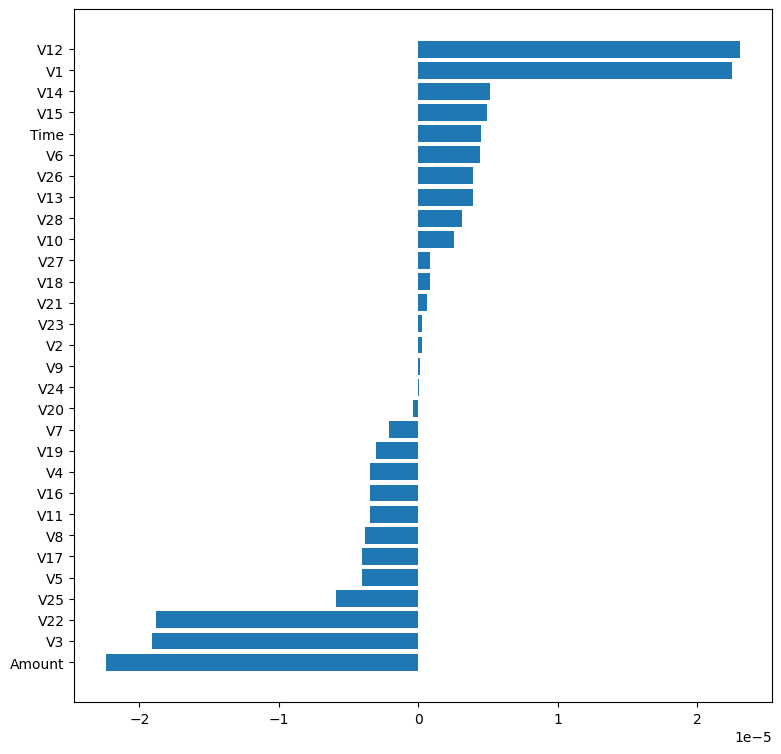

In [41]:
import matplotlib.pyplot as plt
features = []
scores = []
for k in explanation.explanations[0].attributions[0].feature_attributions:
    features.append(k)
    scores.append(explanation.explanations[0].attributions[0].feature_attributions[k])
features = [x for _, x in sorted(zip(scores, features))]
scores = sorted(scores)
fig, ax = plt.subplots()
fig.set_size_inches(9, 9)
ax.barh(features, scores)
fig.show()

The amount feature contribution is negative, that means that if a transaction has a very high amount, it doesnt mean it is a fraud

---
## Remove Resources
see notebook "99 - Cleanup"